  content_type  engagement_rate
0        image         9.826667
2        video         5.283333
1         text         2.783333


<ipython-input-1-642c4a900577>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="content_type", y="engagement_rate", data=engagement_by_type, palette="viridis")


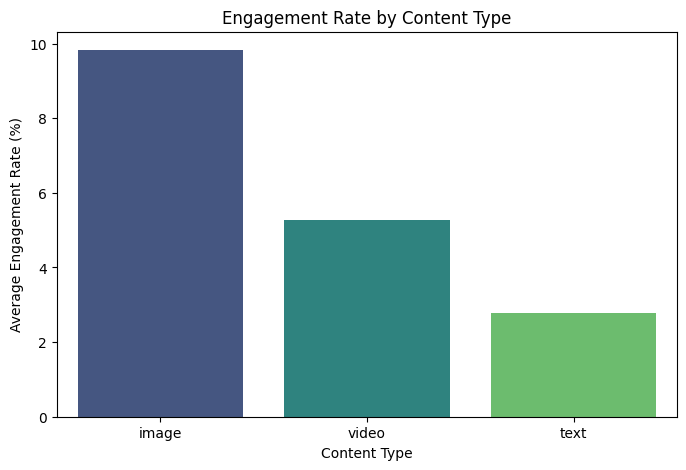

In [1]:
#7)Experiment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_content_engagement(file_path):
    """
    Analyzes which type of content (Image, Video, Text) generates the most engagement.

    Parameters:
    file_path (str): Path to the CSV file containing content type, likes, shares, comments, and followers.

    Returns:
    pandas.DataFrame: Aggregated engagement rate per content type.
    """
    # Load dataset
    df = pd.read_csv(file_path)

    # Ensure numeric columns
    df[['likes', 'shares', 'comments', 'followers']] = df[['likes', 'shares', 'comments', 'followers']].fillna(0).astype(int)

    # Calculate engagement rate
    df["engagement_rate"] = ((df["likes"] + df["shares"] + df["comments"]) / df["followers"]) * 100
    df["engagement_rate"] = df["engagement_rate"].round(2)  # Round to 2 decimal places

    # Group by content type and calculate average engagement rate
    engagement_by_type = df.groupby("content_type")["engagement_rate"].mean().reset_index()

    # Sort for better visualization
    engagement_by_type = engagement_by_type.sort_values(by="engagement_rate", ascending=False)

    # Print results
    print(engagement_by_type)

    # Visualization
    plt.figure(figsize=(8, 5))
    sns.barplot(x="content_type", y="engagement_rate", data=engagement_by_type, palette="viridis")
    plt.xlabel("Content Type")
    plt.ylabel("Average Engagement Rate (%)")
    plt.title("Engagement Rate by Content Type")
    plt.show()

    return engagement_by_type

# Example usage:
file_path = "/content/7.csv"  # Update with your actual file name
result_df = analyze_content_engagement(file_path)